In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
df1 = pd.read_csv(r"C:\Users\anshi\Downloads\Bengaluru_House_Data.csv")
df1


area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Bedroom  Theanmp       2600   5.0      3.0  120.00  
2          3 BHK      NaN       1440   2.0      3.0   62.00  
3          3 BHK  Soiewre       1521   3.0      1.0   95.00  
4          2 BHK      NaN       1200   2.0      1.0   51.00  
...          ...      ...        ...   ...      ...     ...  
13315  5 Bedroom  ArsiaEx       3453   4.0      0.0  231.00  
13316      4 BHK      NaN       3600   5.0      NaN  400.00  
13317      2 BHK  Mahla T       1141   2.0      1.0   60.00  
13318      4 BHK  SollyCl       4689   4.0      1.0  488.00  
13319      1 BHK      NaN        550   1.0      1.0   17.00  

[13320 rows x 9 columns]

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(['area_type','society','availability'],axis='columns')
df2.head()

location       size total_sqft  bath  balcony   price
0  Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00
2               Uttarahalli      3 BHK       1440   2.0      3.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00
4                  Kothanur      2 BHK       1200   2.0      1.0   51.00

In [6]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df2['balcony'] = df2['balcony'].fillna(0)

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [9]:
df3=df2.dropna()

In [10]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 6)

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\anshi\AppData\Local\Temp\ipykernel_1127056\4200255786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [14]:
df3.head()

location       size total_sqft  bath  balcony   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0      3.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0      1.0   51.00    2

In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
df3[df3.bhk>20]

location        size total_sqft  bath  balcony  price  \
1718  2Electronic City Phase II      27 BHK       8000  27.0      0.0  230.0   
4684                Munnekollal  43 Bedroom       2400  40.0      0.0  660.0   

      bhk  
1718   27  
4684   43

In [17]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath  balcony    price  \
30            Yelahanka      4 BHK     2100 - 2850   4.0      0.0  186.000   
122              Hebbal      4 BHK     3067 - 8156   4.0      0.0  477.000   
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0      0.0   54.005   
165            Sarjapur      2 BHK     1145 - 1340   2.0      0.0   43.490   
188            KR Puram      2 BHK     1015 - 1540   2.0      0.0   56.800   
410             Kengeri      1 BHK  34.46Sq. Meter   1.0      0.0   18.500   
549         Hennur Road      2 BHK     1195 - 1440   2.0      0.0   63.770   
648             Arekere  9 Bedroom       4125Perch   9.0      0.0  265.000   
661           Yelahanka      2 BHK     1120 - 1145   2.0      0.0   48.130   
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0      0.0  445.000   

     bhk  
30     4  
122    4  
137    2  
165    2  
188    2  
410    1  
549    2  
648    9  
661    2  
672    4

In [20]:
 def convert_sqft_to_num(x):
        tokens=x.split('-')
        if len(tokens)==2:
            return (float(tokens[0])+float(tokens[1]))/2
        try:
            return float(x)
        except:
            return None

In [21]:
convert_sqft_to_num('2166')

2166.0

In [22]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [23]:
convert_sqft_to_num('34.46Sq. Meter') 

In [24]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

location       size  total_sqft  bath  balcony   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0      1.0   51.00    2

In [25]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [26]:
(2100+2850)/2

2475.0

In [27]:
df5=df4.copy()

In [28]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [29]:
df5

location       size  total_sqft  bath  balcony   price  \
0      Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00   
2                   Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00   
3            Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00   
4                      Kothanur      2 BHK      1200.0   2.0      1.0   51.00   
...                         ...        ...         ...   ...      ...     ...   
13315                Whitefield  5 Bedroom      3453.0   4.0      0.0  231.00   
13316             Richards Town      4 BHK      3600.0   5.0      0.0  400.00   
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0      1.0   60.00   
13318           Padmanabhanagar      4 BHK      4689.0   4.0      1.0  488.00   
13319              Doddathoguru      1 BHK       550.0   1.0      1.0   17.00   

       bhk  price_per_sqft  
0        2     3699.810606  
1        4     4615.384615  
2        3     4305.555556  
3        3     6245.890861  
4        2     4250.000000  
...    ...             ...  
13315    5     6689.834926  
13316    4    11111.111111  
13317    2     5258.545136  
13318    4    10407.336319  
13319    1     3090.909091  

[13246 rows x 8 columns]

In [30]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1304,), dtype=object)

In [31]:
len(df5.location.unique())

1304

In [32]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [33]:
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [34]:
len(location_stats[location_stats<=10])

1052

In [35]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [36]:
location_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [37]:
len(df5.location.unique())

1293

In [38]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [39]:
df5.head(10)

location       size  total_sqft  bath  balcony   price  \
0  Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00   
2               Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00   
3        Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00   
4                  Kothanur      2 BHK      1200.0   2.0      1.0   51.00   
5                Whitefield      2 BHK      1170.0   2.0      1.0   38.00   
6          Old Airport Road      4 BHK      2732.0   4.0      0.0  204.00   
7              Rajaji Nagar      4 BHK      3300.0   4.0      0.0  600.00   
8              Marathahalli      3 BHK      1310.0   3.0      1.0   63.25   
9                     other  6 Bedroom      1020.0   6.0      0.0  370.00   

   bhk  price_per_sqft  
0    2     3699.810606  
1    4     4615.384615  
2    3     4305.555556  
3    3     6245.890861  
4    2     4250.000000  
5    2     3247.863248  
6    4     7467.057101  
7    4    18181.818182  
8    3     4828.244275  
9    6    36274.509804

In [40]:
 600/6

100.0

In [41]:
df5[df5.total_sqft/df5.bhk<300].head()

location       size  total_sqft  bath  balcony  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0      0.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0      0.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0      1.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0      0.0   85.0    8   
70                other  3 Bedroom       500.0   3.0      2.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [42]:
df5[df5.total_sqft/df5.bhk<300].shape

(744, 8)

In [43]:
df5.shape

(13246, 8)

In [44]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 8)

In [45]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [46]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outliers(df6)
df7.shape

(10241, 8)

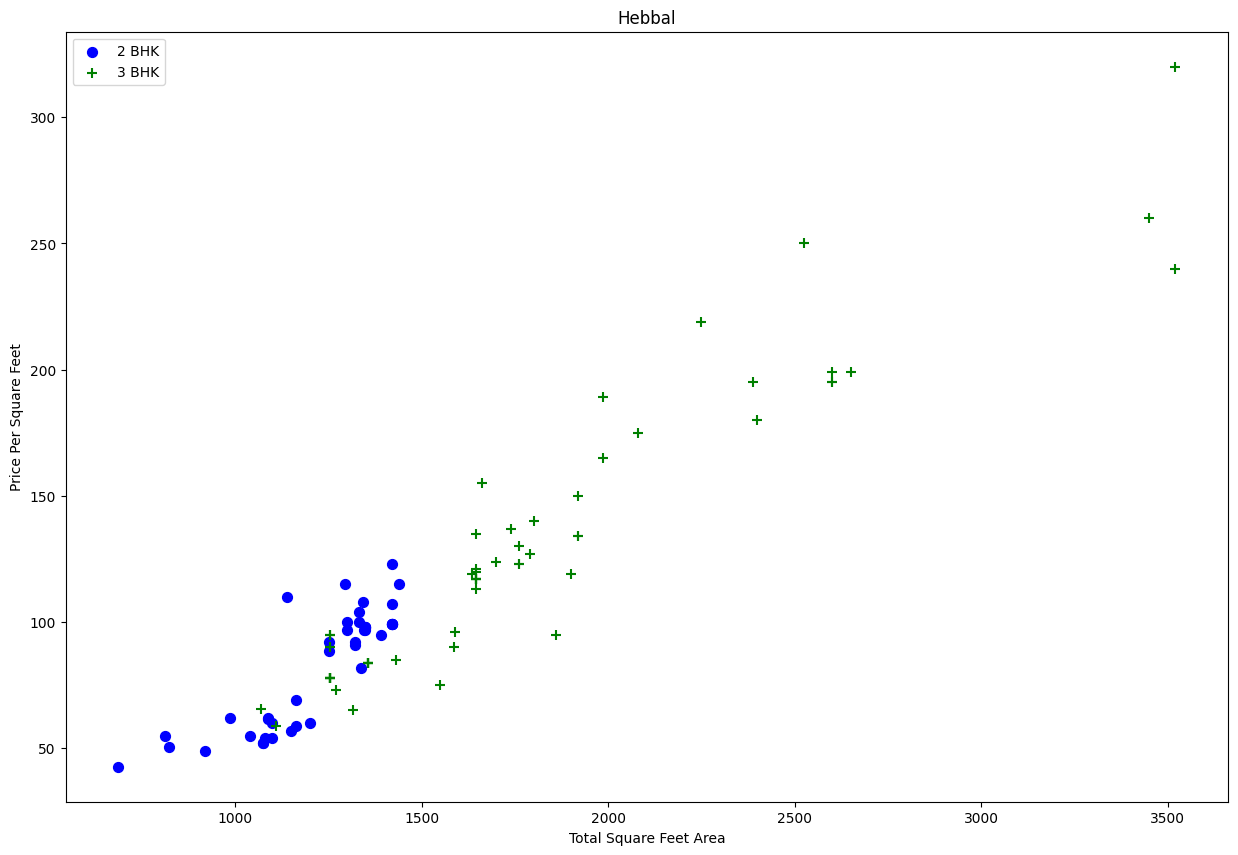

In [47]:
 def plot_scatter_chart(df,location):
        bhk2=df[(df.location==location)&(df.bhk==2)]
        bhk3=df[(df.location==location)&(df.bhk==3)]
        matplotlib.rcParams['figure.figsize']=(15,10)
        plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
        plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
        plt.xlabel("Total Square Feet Area")
        plt.ylabel("Price Per Square Feet")
        plt.title(location)
        plt.legend()
plot_scatter_chart(df7,"Hebbal")

In [48]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values
                )

    return df.drop(exclude_indices, axis='index')

df8=remove_bhk_outliers(df7)
df8.shape

(7329, 8)

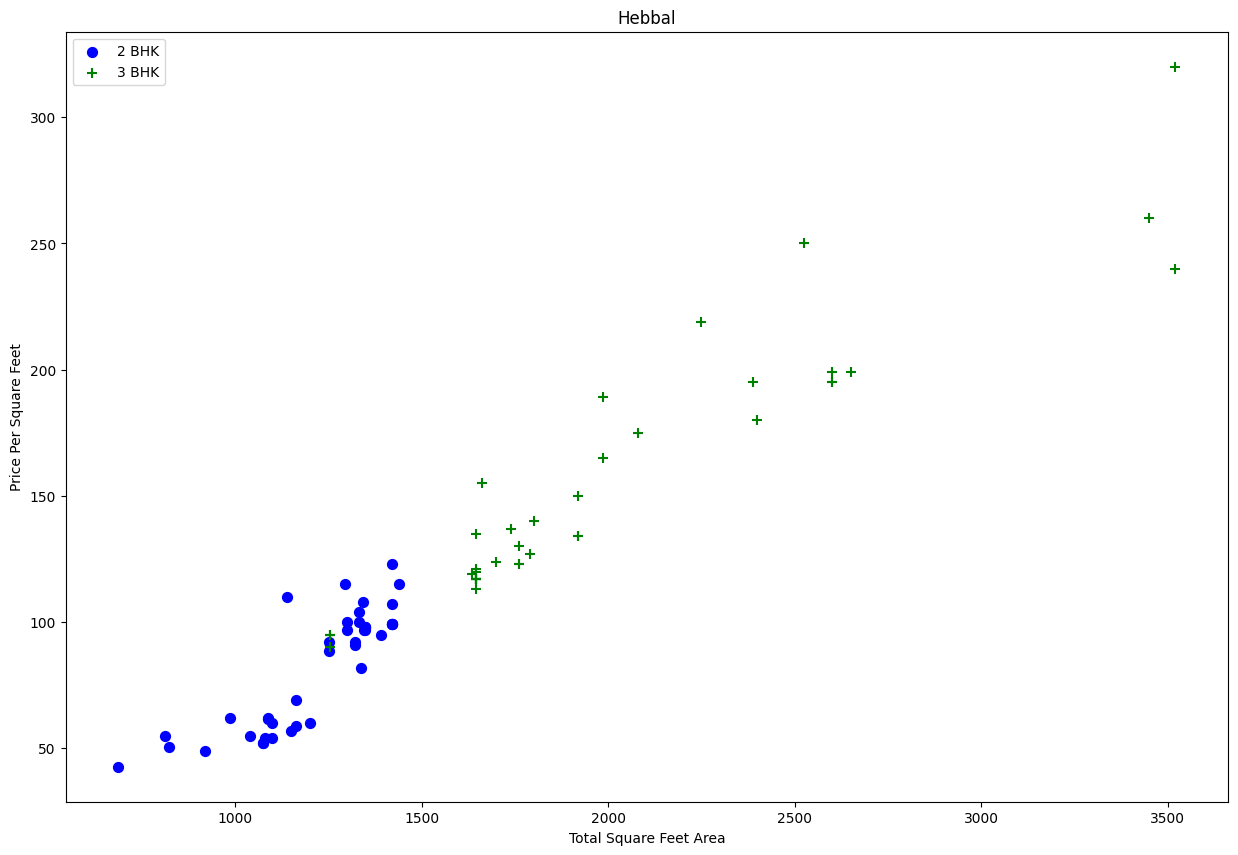

In [49]:
def plot_scatter_chart(df,location):
        bhk2=df[(df.location==location)&(df.bhk==2)]
        bhk3=df[(df.location==location)&(df.bhk==3)]
        matplotlib.rcParams['figure.figsize']=(15,10)
        plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
        plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
        plt.xlabel("Total Square Feet Area")
        plt.ylabel("Price Per Square Feet")
        plt.title(location)
        plt.legend()
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

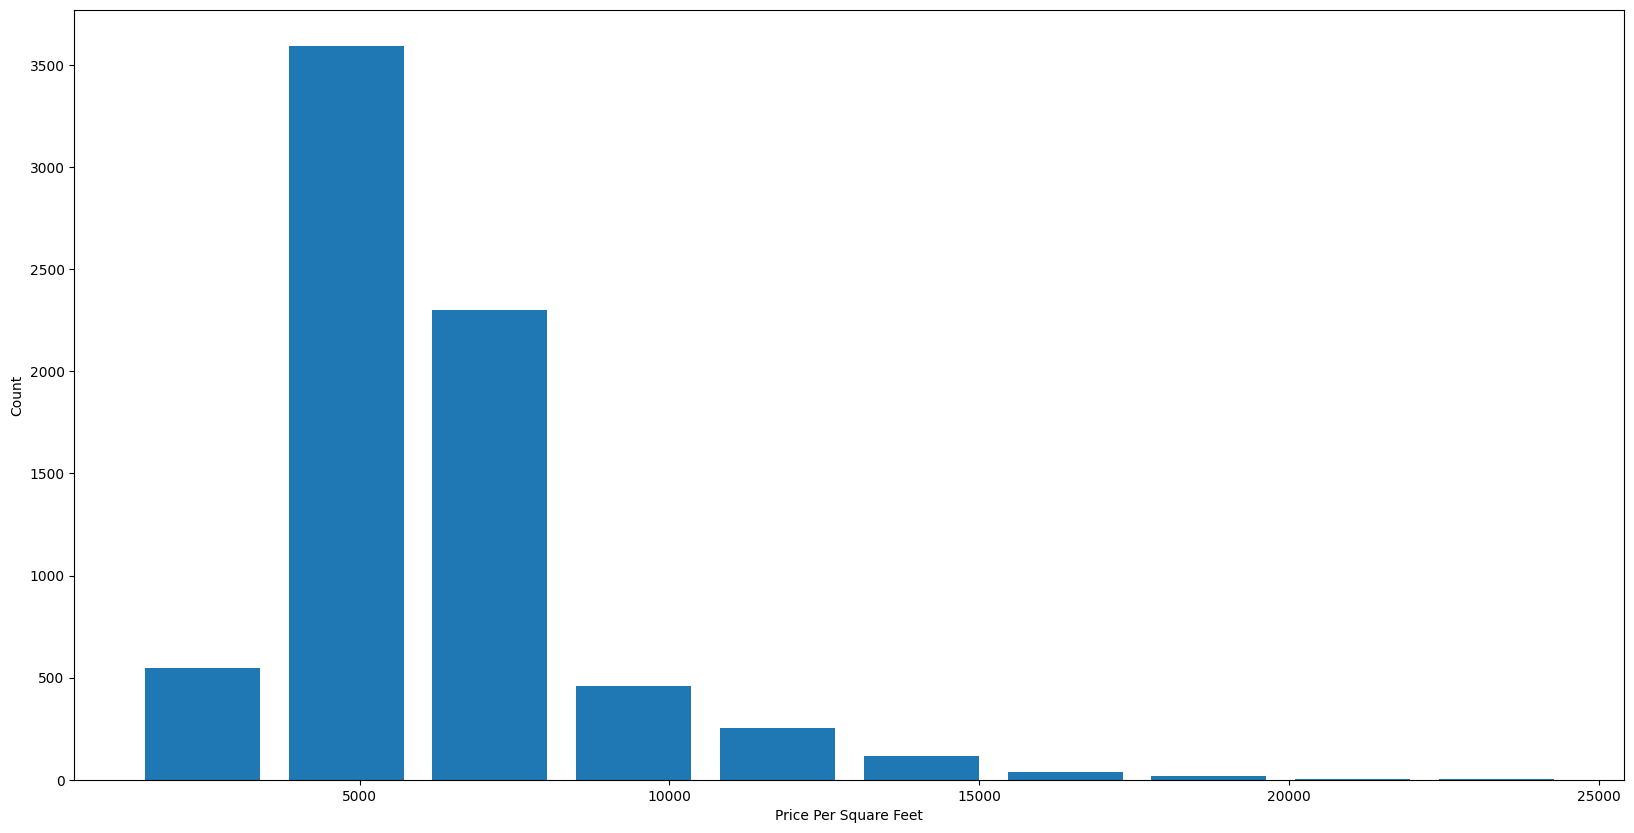

In [50]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [51]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [52]:
df8[df8.bath>10]

location    size  total_sqft  bath  balcony  price  bhk  \
5277  Neeladri Nagar  10 BHK      4000.0  12.0      0.0  160.0   10   
8486           other  10 BHK     12000.0  12.0      0.0  525.0   10   
8575           other  16 BHK     10000.0  16.0      0.0  550.0   16   
9308           other  11 BHK      6000.0  12.0      0.0  150.0   11   
9639           other  13 BHK      5425.0  13.0      0.0  275.0   13   

      price_per_sqft  
5277     4000.000000  
8486     4375.000000  
8575     5500.000000  
9308     2500.000000  
9639     5069.124424

Text(0, 0.5, 'Count')

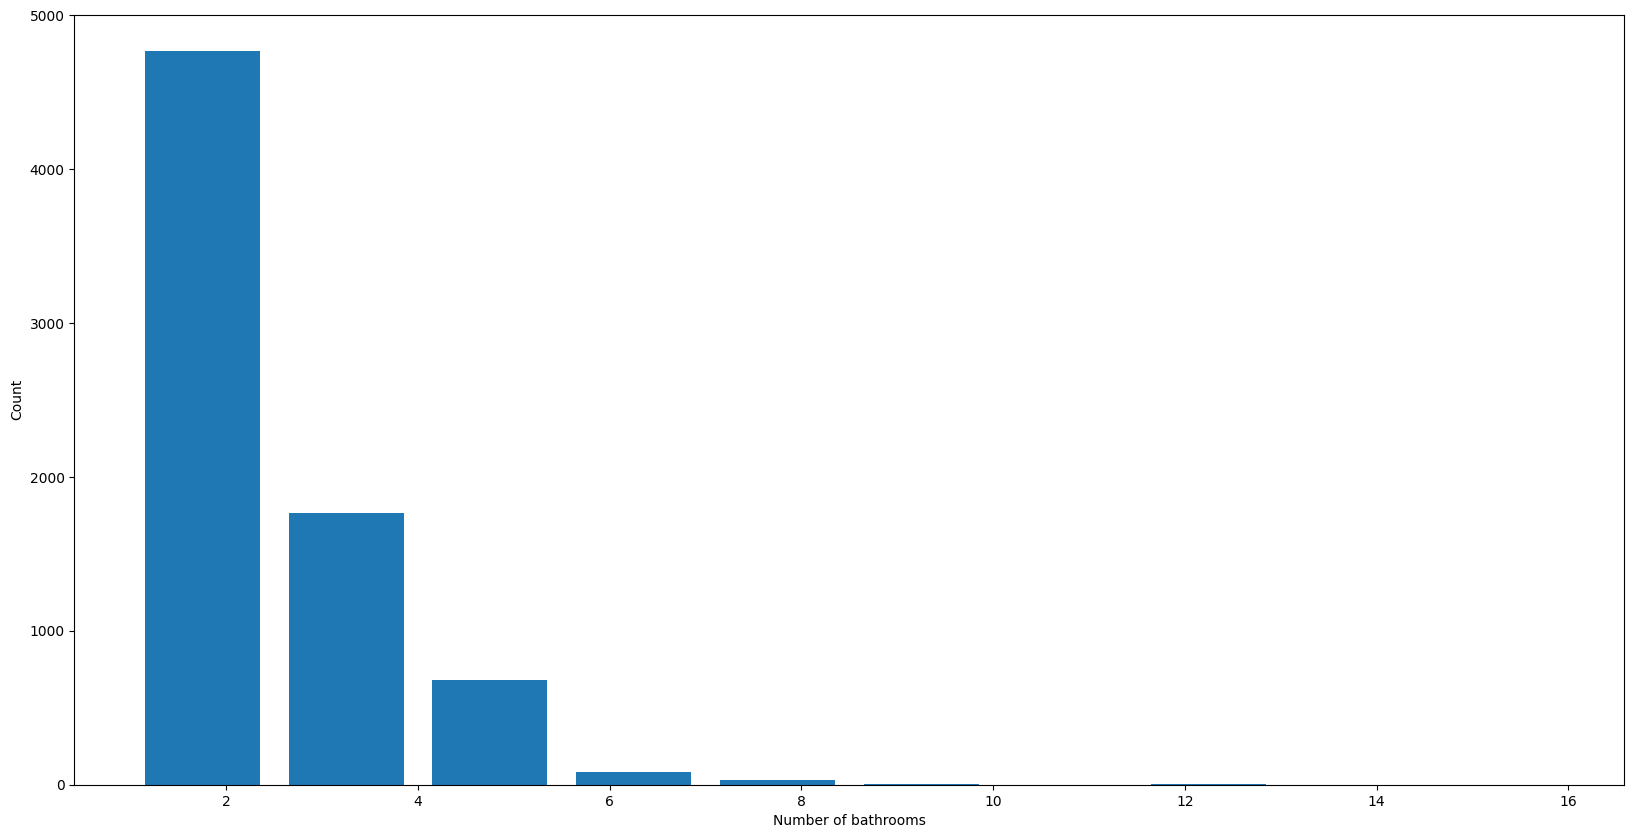

In [53]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [54]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath  balcony   price  bhk  \
1626  Chikkabanavar  4 Bedroom      2460.0   7.0      2.0    80.0    4   
5238     Nagasandra  4 Bedroom      7000.0   8.0      0.0   450.0    4   
6711    Thanisandra      3 BHK      1806.0   6.0      2.0   116.0    3   
8411          other      6 BHK     11338.0   9.0      1.0  1000.0    6   

      price_per_sqft  
1626     3252.032520  
5238     6428.571429  
6711     6423.034330  
8411     8819.897689

In [55]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 8)

In [56]:
df10=df9.drop(["size","price_per_sqft"],axis='columns')
df10.head()

location  total_sqft  bath  balcony  price  bhk
0  1st Block Jayanagar      2850.0   4.0      1.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0      2.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0      3.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0      0.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0      2.0  148.0    2

In [57]:
df10['location'].nunique()


242

location_target = df10.groupby('location')['price'].mean()
df10['location_encoded'] = df10['location'].map(location_target)

df10.drop('location', axis=1, inplace=True)
df10.head()

In [58]:
df10.head()

location  total_sqft  bath  balcony  price  bhk
0  1st Block Jayanagar      2850.0   4.0      1.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0      2.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0      3.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0      0.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0      2.0  148.0    2

In [59]:
print(df10.columns)


Index(['location', 'total_sqft', 'bath', 'balcony', 'price', 'bhk'], dtype='object')


dummies = pd.get_dummies(df10['location'])
df10_encoded = pd.concat([df10.drop('location', axis=1), dummies], axis=1)


simple numeric features for QML

In [60]:
import pennylane as qml
from pennylane import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pennylane.numpy as np

In [61]:
X_reduced = df10[["total_sqft", "bath", "bhk", "balcony"]].values


In [1]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Use a few features for 4-qubit circuit
features = ['total_sqft', 'bath', 'bhk', 'balcony']
X = df10[features].values
y = df10['price'].values

# Normalize inputs and target
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_max = max(y)
y = y / y_max

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Quantum device
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

# Quantum circuit
@qml.qnode(dev)
def circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(np.pi * inputs[i], wires=i)
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

# Optimization
from pennylane.optimize import AdamOptimizer

n_layers = 3
weights = np.random.randn(n_layers, n_qubits, requires_grad=True)
opt = AdamOptimizer(stepsize=0.1)
epochs = 100

for epoch in range(epochs):
    loss = 0
    for xi, yi in zip(X_train, y_train):
        weights = opt.step(lambda w: (circuit(xi, w) - yi)**2, weights)
        loss += (circuit(xi, weights) - yi) ** 2
    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Avg Loss: {loss / len(X_train)}")

# Prediction
y_pred = np.array([circuit(xi, weights) for xi in X_test]) * y_max
y_test = y_test * y_max

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("âœ… Quantum RMSE:", rmse)
print("âœ… Quantum RÂ² Score:", r2)



KeyboardInterrupt



X = df10_encoded.drop('price', axis=1).values
y = df10_encoded['price'].values

X = df10[["total_sqft", "bath", "location_encoded", "bhk","balcony",]].values
y = df10['price'].values

# Normalize
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

n_qubits = 6
dev = qml.device("default.qubit", wires=n_qubits)

def encode(x):
    for i in range(len(x)):
        qml.RY(np.pi * x[i], wires=i)

def variational(params):
    for i in range(n_qubits):
        qml.RY(params[i], wires=i)
        qml.RZ(params[i + n_qubits], wires=i)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])

@qml.qnode(dev)
def circuit(x, params):
    encode(x)
    variational(params)
    return qml.expval(qml.PauliZ(0))

X_train = X_train[:30]
y_train = y_train[:30]

def predict(X, params):
    return np.array([circuit(x, params) for x in X])

def cost(params, X, y):
    y_pred = predict(X, params)
    return np.mean((y - y_pred) ** 2)

params = np.random.randn(2 * n_qubits, requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.1)

epochs = 50
loss_list = []

for epoch in range(epochs):
    params = opt.step(lambda p: cost(p, X_train, y_train), params)
    loss = cost(params, X_train, y_train)
    loss_list.append(loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss}")

# Evaluate the model
y_pred_scaled = predict(X_test, params)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Manually compute RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)
print("RÂ² Score:", r2_score(y_true, y_pred))

# Plot predictions vs true values
plt.plot(y_true, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("VQR Predictions vs True Values")
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.show()


from sklearn.metrics import mean_squared_error

# If your sklearn version does NOT support squared=False, use manual sqrt:
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)


from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
print("RÂ² Score:", r2)


rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"âœ… Model Evaluation:")
print(f"ðŸ”¹ RMSE: {rmse:.3f}")
print(f"ðŸ”¹ RÂ² Score: {r2:.3f}")


from sklearn.metrics import mean_squared_error, r2_score

# Get predictions (already scaled between 0 and 1)
y_pred_scaled = predict(X_test, params)

# Inverse transform to original price scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
accuracy_percentage = r2 * 100

# Print results
print("âœ… RMSE:", rmse)
print("âœ… RÂ² Score:", r2)
print(f"âœ… Model Accuracy: {accuracy_percentage:.2f}%")
